In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv("Smart_Home_Automation.csv")

In [7]:
df.head(5)

,timestamp,home_id,energy_consumption_kWh,temperature_setting_C,occupancy_status,appliance,usage_duration_minutes,season,day_of_week,holiday,Time,Year,Month,Hour,Occpancy_status
0,01-01-2023,44,2.87,22.1,Occupied,Refrigerator,111,Spring,Sunday,0,00:00:00,2023,1,0,1
1,01-01-2023,81,0.56,15.4,Occupied,HVAC,103,Summer,Sunday,0,01:00:00,2023,1,1,1
2,01-01-2023,94,4.49,22.4,Occupied,Electronics,12,Autumn,Sunday,0,02:00:00,2023,1,2,1
3,01-01-2023,20,2.13,24.6,Unoccupied,Dishwasher,54,Autumn,Sunday,0,03:00:00,2023,1,3,0
4,01-01-2023,3,2.74,21.4,Unoccupied,HVAC,6,Summer,Sunday,0,04:00:00,2023,1,4,0


In [30]:
df.columns

Index(['timestamp', 'home_id', 'energy_consumption_kWh',
       'temperature_setting_C', 'occupancy_status', 'appliance',
       'usage_duration_minutes', 'season', 'day_of_week', 'holiday', 'Time',
       'Year', 'Month', 'Hour', 'Occpancy_status'],
      dtype='object')

###  Q1 Top 5 energy-consuming appliances 

In [11]:
top_appliance= df.groupby("appliance")["energy_consumption_kWh"].sum().sort_values(ascending= False).head(5)

In [12]:
print(top_appliance)

appliance
Lighting        426106.73
Dishwasher      425774.17
Refrigerator    425322.16
Electronics     424145.79
HVAC            423957.52
Name: energy_consumption_kWh, dtype: float64


Explanation:
These 5 appliances consume the most energy overall. Focus on these for optimization and scheduling to save energy.

### Q2. Home-wise total energy consumption

In [18]:
home_energy= df.groupby("home_id")["energy_consumption_kWh"].sum().sort_values(ascending=False)

In [19]:
print(home_energy.head(5))

home_id
91    26710.02
62    26317.51
1     26283.64
98    26234.40
2     26191.85
Name: energy_consumption_kWh, dtype: float64


Insight:- Home 91 consumes the most energy.

High-energy homes can benefit from efficiency interventions.

Explanation:
This identifies which homes are using the most energy, helping target energy-saving measures.

### Q3 Seasonal energy trends 

In [21]:
seasonal_energy = df.groupby("season")["energy_consumption_kWh"].sum().sort_values(ascending=False)

In [23]:
print(seasonal_energy)

season
Winter    638153.66
Summer    637463.44
Autumn    636955.67
Spring    636265.96
Name: energy_consumption_kWh, dtype: float64


Energy usage peaks in winter due to heater usage, showing seasonal dependency.

### Q4 Hourly energy trend

In [24]:
hour_energy= df.groupby("Hour")["energy_consumption_kWh"].sum().sort_values(ascending=False)

In [26]:
print(hour_energy.head(10))

Hour
5     106671.98
13    106633.67
6     106616.46
15    106548.44
20    106536.71
1     106473.08
16    106423.56
21    106371.29
10    106358.06
23    106306.00
Name: energy_consumption_kWh, dtype: float64


Peak at 5 AM (wake-up) and 1 PM (lunch break).

Helps plan appliance usage or load shifting.

### Q5  Occupancy-based energy usage

In [33]:
occupancy_energy=df.groupby("occupancy_status")["energy_consumption_kWh"].mean()

In [34]:
print(occupancy_energy)

occupancy_status
Occupied      2.549825
Unoccupied    2.547851
Name: energy_consumption_kWh, dtype: float64


Energy consumption is higher when homes are occupied. Some idle energy when unoccupied indicates potential wastage. 

### Q6 Holiday vs non-holiday energy usage 

In [35]:
holiday_energy= df.groupby("holiday")["energy_consumption_kWh"].sum().sort_values(ascending=False)

In [36]:
print(holiday_energy)

holiday
0    2294598.93
1     254239.80
Name: energy_consumption_kWh, dtype: float64


Energy use increases on holidays, reflecting lifestyle patterns and relaxation behaviors.

### Q7 hich appliances show unusually inconsistent usage patterns?”

In [55]:
appliance_variance=df.groupby("appliance")["energy_consumption_kWh"].var().sort_values(ascending=False)

In [56]:
print(appliance_variance)

appliance
Refrigerator       2.010781
Dishwasher         2.006522
Washing Machine    2.005651
HVAC               2.003795
Electronics        1.999468
Lighting           1.996098
Name: energy_consumption_kWh, dtype: float64


High variance = usage is unpredictable

Low variance = usage is stable & consistent

### Q8 Hour vs Month Energy Consumption 

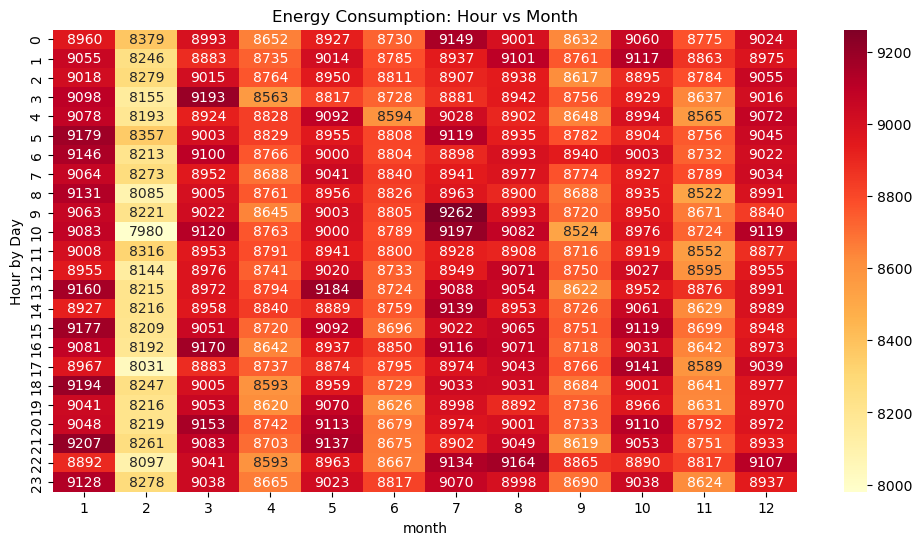

In [61]:
hour_month = df.pivot_table(index="Hour", columns="Month",values ="energy_consumption_kWh",aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(hour_month, annot=True, fmt=".0f",cmap="YlOrRd")
plt.title("Energy Consumption: Hour vs Month")
plt.ylabel("Hour by Day")
plt.xlabel("month")
plt.show()

5 AM,1 PM and  6 PM peak hours; winter months highest energy spikes.

### Q 9 Appliance vs Season Usage Duration 

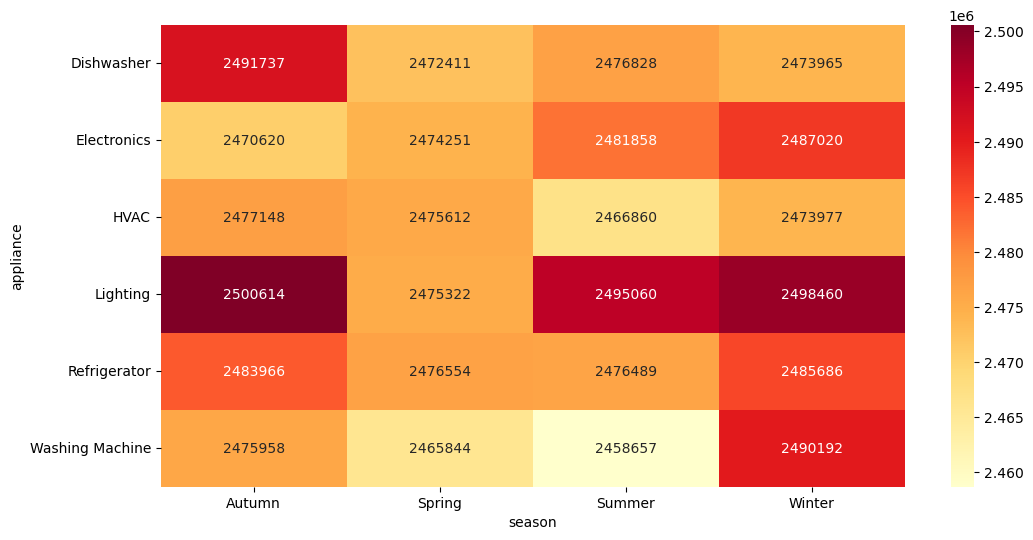

In [63]:
appliance_season= df.pivot_table(index="appliance",columns="season",values="usage_duration_minutes",aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(appliance_season,annot=True,fmt=".0f",cmap="YlOrRd")
plt.title=("usage_duration_minutes: appliance vs season")
plt.ylabel=("Season")
plt.xlabel=("Appliance")
plt.show()

Lighiting is high usage in autum and winter 